In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions to reuse plotting code
import PlotFunctions

from IPython.display import Latex

from sklearn import preprocessing

import seaborn as sns
sns.set()

# Read-In Data

In [3]:
data_path = "data/"
raw_data = pd.read_csv(data_path+"winequality-red.csv", delimiter=';')
raw_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data = raw_data.copy()

# Exploratory Data Analysis

In [5]:
# Find range of quality
print(min(data["quality"]))
print(max(data["quality"])) 

3
8


In [6]:
data.describe(include="all") 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
data.isnull().sum() # Check if there are Null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Isolate Features
all_features = data.iloc[:,:-1]

# Check shape of features
print(all_features.shape)

all_features.head()

(1599, 11)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [9]:
# Save feature column names to variable
all_feature_names = all_features.columns.values

### Check for outliers

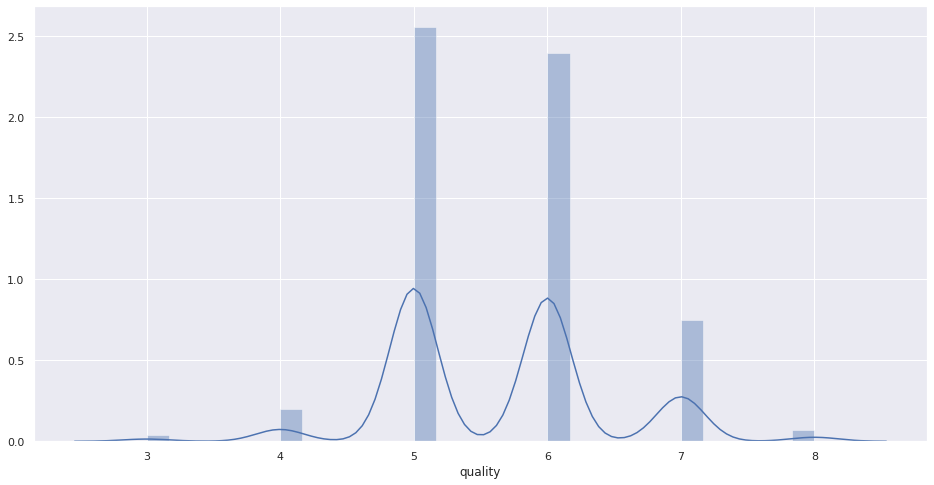

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(data["quality"])

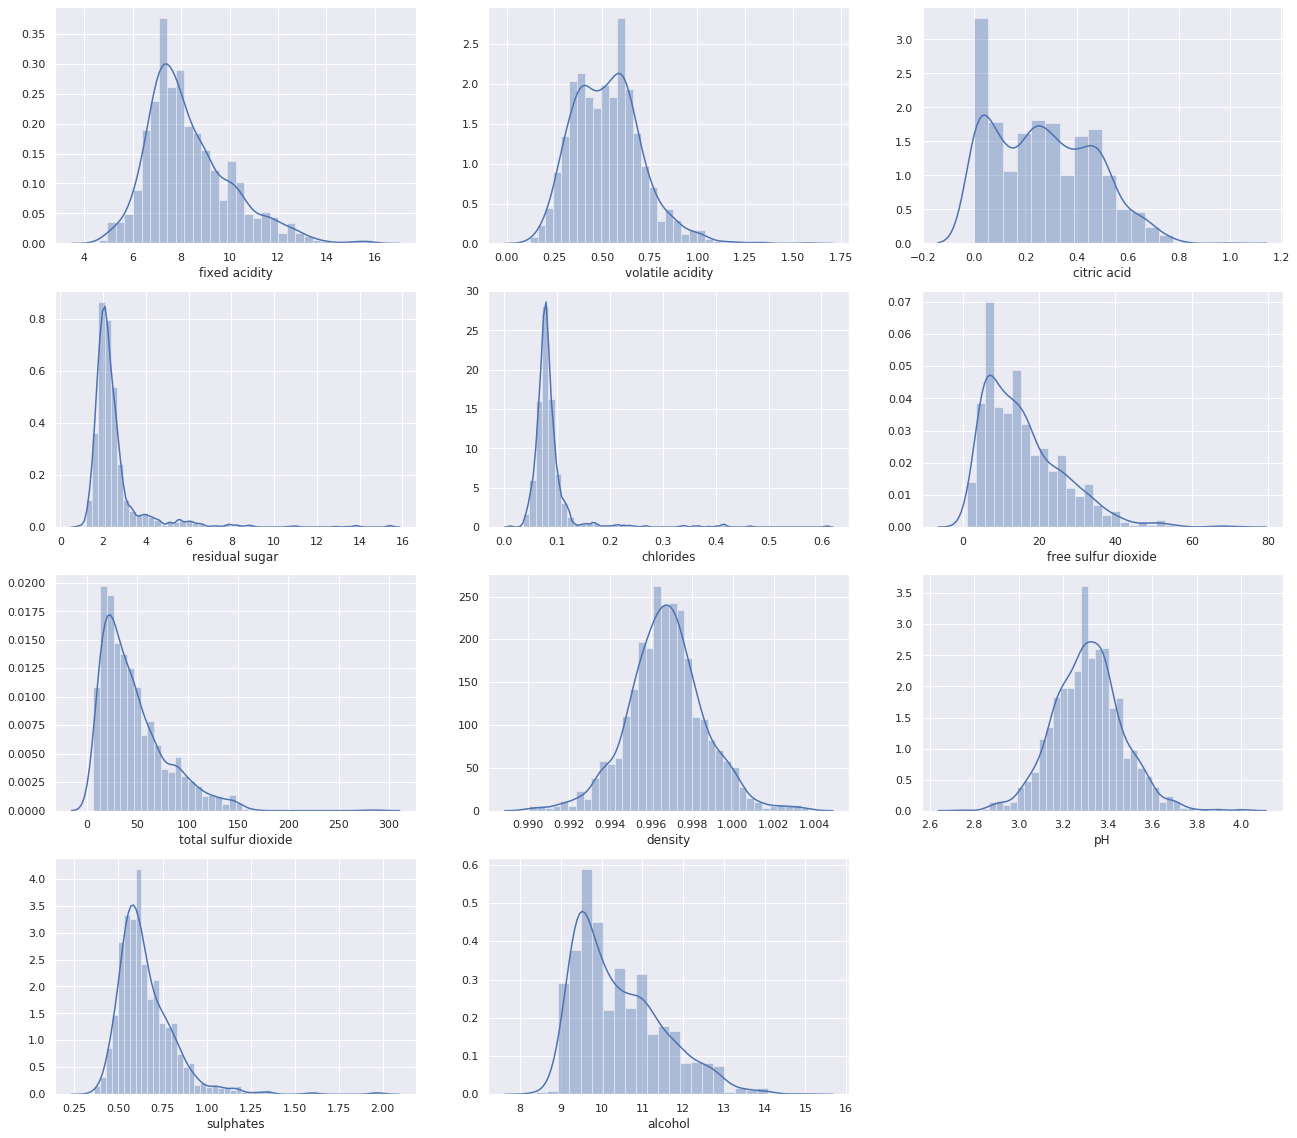

In [11]:
PlotFunctions.PlotDists(all_features)

Let's get rid of some of these outliers and let's see if the distributions become more normal.

We are going to find the interquartile range(IQR), which is the third quartile minus the first. We will get rid of any values that are 1.5 times greater than or less than the IQR. It looks like we will only be getting rid of values that are 1.5 times greater, however, according to the above distributions.

In [12]:
outlier_indices = []

for i in range(all_features.shape[1]):
    current_feature = all_features[all_feature_names[i]]
    
    quantile_25 = current_feature.quantile(0.25)
    quantile_75 = current_feature.quantile(0.75)
    
    outlier_plus_minus = 1.5 * (quantile_75 - quantile_25)
    
    lower_limit = quantile_25 - outlier_plus_minus
    upper_limit = quantile_75 + outlier_plus_minus
    
    for j,val in enumerate(current_feature):
        if( (val <= lower_limit) or (val >= upper_limit) ):
            outlier_indices.append(j)

print(outlier_indices)
print(len(outlier_indices))

[205, 206, 243, 244, 264, 294, 328, 338, 339, 347, 353, 359, 363, 364, 366, 374, 381, 391, 394, 409, 429, 440, 442, 446, 470, 472, 509, 510, 516, 538, 544, 548, 554, 555, 557, 559, 560, 564, 565, 596, 599, 601, 603, 611, 652, 680, 811, 814, 1224, 38, 94, 120, 126, 127, 134, 199, 553, 672, 690, 700, 705, 710, 724, 899, 1261, 1299, 1312, 1467, 151, 9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274, 275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375, 378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480, 484, 494, 501, 502, 510, 515, 516, 538, 539, 541, 554, 555, 556, 557, 558, 559, 564, 595, 606, 608, 624, 625, 645, 649, 652, 659, 690, 705, 719, 740, 800, 878, 884, 889, 903, 904, 910, 911, 913, 917, 923, 941, 944, 946, 974, 1032, 1038, 1043, 1056, 1057, 1059, 1071, 1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096, 1114, 1133, 1138, 1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239, 1244, 1257, 1276, 1288, 1289, 1295

In [13]:
# Let's only keep unique indices, don't want to double count
outlier_indices = list(set(outlier_indices))
print(outlier_indices)
print(len(outlier_indices))

[9, 11, 13, 14, 15, 17, 18, 19, 33, 35, 38, 39, 40, 42, 43, 45, 55, 57, 64, 65, 79, 81, 83, 86, 88, 90, 91, 92, 94, 95, 106, 109, 120, 125, 126, 127, 130, 134, 142, 144, 145, 147, 151, 154, 155, 156, 157, 161, 163, 164, 169, 181, 188, 189, 190, 192, 199, 201, 205, 206, 210, 215, 219, 226, 240, 243, 244, 258, 264, 268, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279, 281, 283, 291, 294, 303, 307, 308, 313, 324, 325, 326, 327, 328, 330, 331, 335, 338, 339, 340, 347, 353, 354, 359, 363, 364, 366, 368, 369, 372, 374, 375, 376, 377, 378, 381, 391, 394, 395, 396, 400, 408, 409, 413, 414, 415, 417, 418, 429, 440, 442, 446, 447, 451, 455, 463, 467, 470, 472, 477, 480, 482, 483, 484, 494, 497, 501, 502, 503, 504, 506, 509, 510, 512, 515, 516, 517, 522, 523, 538, 539, 541, 544, 548, 549, 553, 554, 555, 556, 557, 558, 559, 560, 564, 565, 566, 567, 568, 584, 586, 588, 591, 595, 596, 599, 601, 603, 606, 608, 611, 614, 618, 624, 625, 634, 636, 637, 638, 639, 645, 649, 650, 651, 652, 656, 657, 659, 

In [14]:
print("Percent to drop: ", round( (len(outlier_indices)/data.shape[0]) * 100, 2 ), "%")

Percent to drop:  25.58 %


25% is a lot of data to drop, let's do it, then see if the more normal distributions are worth dropping that much data. Again, 25%  is a ridiculously high percentage of data to drop.

In [15]:
# Save data with no outliers to variable and print shape
data_no_outliers = data.drop(index=outlier_indices,axis=0).reset_index(drop=True)
print(data_no_outliers.shape)

(1190, 12)


In [16]:
data_no_outliers.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [17]:
# Save new features to variable
features = data_no_outliers.iloc[:,:-1]
features.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

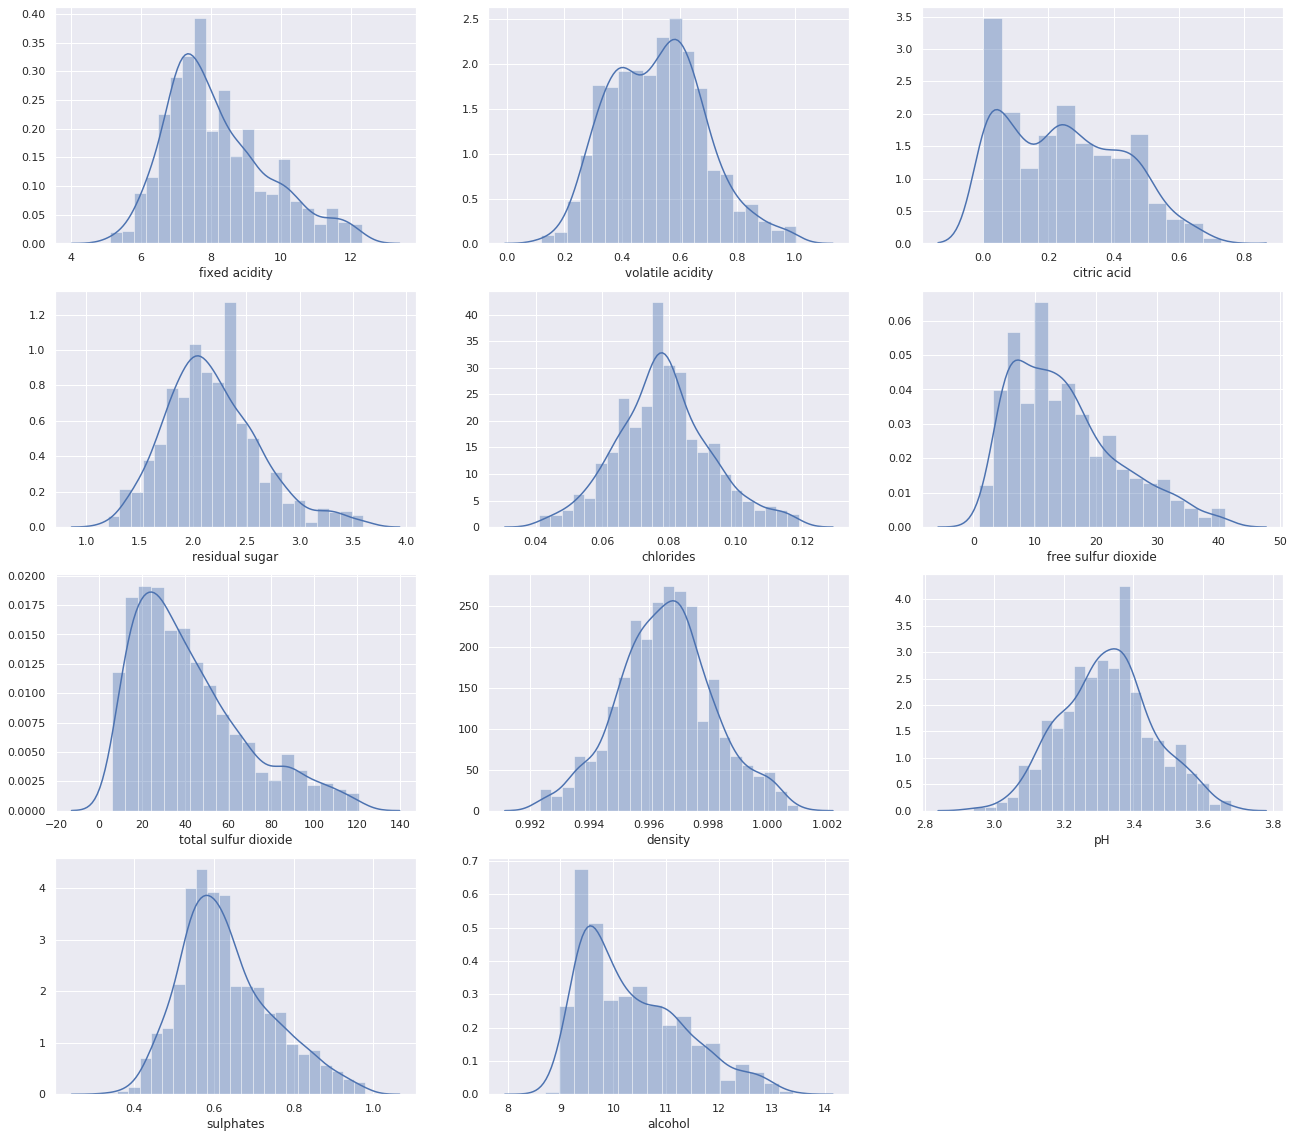

In [18]:
PlotFunctions.PlotDists(features)

These distributions are much better. We'll continue with the outliers removed, but may come back to this if our model doesn't perform well.

### Map Quality values to 0, 1, and 2

In [19]:
targets = data_no_outliers.loc[:,["quality"]]
targets.head()

quality
0        5
1        5
2        5
3        6
4        5

Mapping:

    3 or 4 => 0
    5 or 6 => 1
    7 or 8 => 2

In [20]:
targets["quality"] = targets["quality"].map({3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2})
targets

quality
0           1
1           1
2           1
3           1
4           1
...       ...
1185        1
1186        1
1187        1
1188        1
1189        1

[1190 rows x 1 columns]

In [21]:
np.unique(targets["quality"])

array([0, 1, 2])

In [22]:
# Let's save these categorical qualities to a new df with all the features and without the old quality column
data_categorical = data_no_outliers.copy()
data_categorical = data_categorical.drop(["quality"], axis=1)
data_categorical["targets"] = targets
data_categorical.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  targets  
0      9.4        1  
1      9.8        1  
2      9.8        1  
3      9.8        1  
4      9.4        1

### Standardize Features

In [23]:
scaled_features = preprocessing.scale(features)
data_scaled_features = pd.DataFrame(data=scaled_features,columns=data_categorical.columns.values[:-1])
data_scaled_features["targets"] = data_categorical["targets"]
data_scaled_features.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.523281          1.074692    -1.376063       -0.645049  -0.172968   
1      -0.249565          2.166691    -1.376063        0.938581   1.364655   
2      -0.249565          1.438691    -1.154012        0.259883   0.945303   
3       2.077023         -1.473307     1.732651       -0.645049  -0.242860   
4      -0.523281          1.074692    -1.376063       -0.645049  -0.172968   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450943             -0.308410  0.766555  1.408289  -0.621063   
1             1.148185              0.966059  0.142986 -0.942364   0.410431   
2             0.005951              0.463995  0.267700 -0.487399   0.152557   
3             0.234398              0.695717  0.891269 -1.245674  -0.449148   
4            -0.450943             -0.308410  0.766555  1.408289  -0.621063   

    alcohol  targets  
0 -0.990272        1  
1 -0.580112        1  
2 -0.580112        1  
3 -0.580112        1  
4 -0.990272        1

In [24]:
data_scaled_features.shape

(1190, 12)

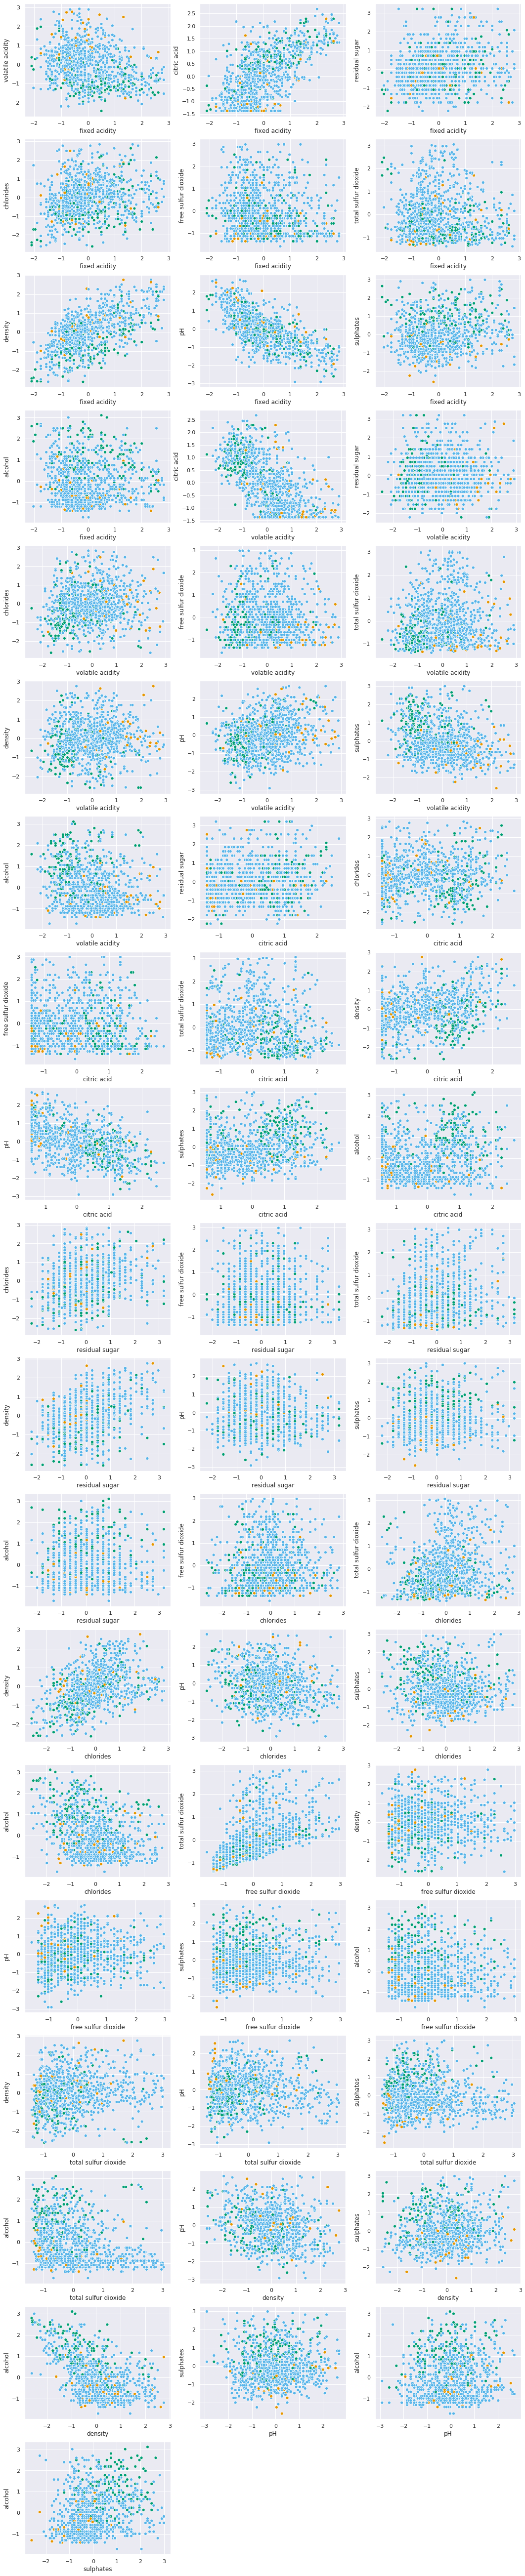

In [25]:
PlotFunctions.PlotFeatures(data_scaled_features)

I don't think a cluster model or SVM would work for this data. It looks like an ensemble method might work well. We'll try the Adaboost algorithm.

Note: This section on standardizing the features turned out to be useless for the final model.

Some of these scatter plots look linearlly dependent on each other, implying multicollinearity. All of them have density on one of the axes. We may drop density since it doesn't look like it's helping.

In [26]:
data_scaled_features.to_csv("data/PreprocessedData.csv",index=False)